# Stock Market Prediction Using Support Vector Regression

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

%matplotlib inline


In [8]:
df =pd.read_csv('tatamo.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7418 non-null   object 
 1   Open Price                 7418 non-null   float64
 2   High Price                 7418 non-null   float64
 3   Low Price                  7418 non-null   float64
 4   Close Price                7418 non-null   float64
 5   WAP                        7418 non-null   float64
 6   No.of Shares               7418 non-null   int64  
 7   No. of Trades              7418 non-null   int64  
 8   Total Turnover (Rs.)       7418 non-null   float64
 9   Deliverable Quantity       4792 non-null   float64
 10  % Deli. Qty to Traded Qty  4792 non-null   float64
 11  Spread High-Low            7418 non-null   float64
 12  Spread Close-Open          7418 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,11-June-2021,346.45,352.90,344.75,350.75,349.506362,1605772,21014,5.612275e+08,336860.0,20.98,8.15,4.30
1,10-June-2021,345.65,347.85,342.50,344.60,345.174438,1154435,13105,3.984815e+08,202476.0,17.54,5.35,-1.05
2,9-June-2021,356.50,358.80,339.60,343.25,350.737299,4480912,59698,1.571623e+09,1345349.0,30.02,19.20,-13.25
3,8-June-2021,346.75,356.50,337.35,352.85,345.857260,3488224,48363,1.206428e+09,1422250.0,40.77,19.15,6.10
4,7-June-2021,338.55,351.00,338.55,345.50,346.270172,5575585,77740,1.930659e+09,2202934.0,39.51,12.45,6.95


### Loading The data

In [9]:
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7418 entries, 2021-06-11 to 1991-01-02
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open Price                 7418 non-null   float64
 1   High Price                 7418 non-null   float64
 2   Low Price                  7418 non-null   float64
 3   Close Price                7418 non-null   float64
 4   WAP                        7418 non-null   float64
 5   No.of Shares               7418 non-null   int64  
 6   No. of Trades              7418 non-null   int64  
 7   Total Turnover (Rs.)       7418 non-null   float64
 8   Deliverable Quantity       4792 non-null   float64
 9   % Deli. Qty to Traded Qty  4792 non-null   float64
 10  Spread High-Low            7418 non-null   float64
 11  Spread Close-Open          7418 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 753.4 KB
None


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-11,346.45,352.90,344.75,350.75,349.506362,1605772,21014,5.612275e+08,336860.0,20.98,8.15,4.30
2021-06-10,345.65,347.85,342.50,344.60,345.174438,1154435,13105,3.984815e+08,202476.0,17.54,5.35,-1.05
2021-06-09,356.50,358.80,339.60,343.25,350.737299,4480912,59698,1.571623e+09,1345349.0,30.02,19.20,-13.25
2021-06-08,346.75,356.50,337.35,352.85,345.857260,3488224,48363,1.206428e+09,1422250.0,40.77,19.15,6.10
2021-06-07,338.55,351.00,338.55,345.50,346.270172,5575585,77740,1.930659e+09,2202934.0,39.51,12.45,6.95


In [10]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
1991-01-11,170.0,175.0,167.5,175.00,0.0,0,0,0.0,NaN,NaN,7.5,5.00
1991-01-09,177.5,177.5,167.5,171.25,0.0,0,0,0.0,NaN,NaN,10.0,-6.25
1991-01-07,170.0,177.5,167.5,176.25,0.0,0,0,0.0,NaN,NaN,10.0,6.25
1991-01-03,175.0,182.5,175.0,182.50,0.0,0,0,0.0,NaN,NaN,7.5,7.50
1991-01-02,175.0,182.5,175.0,182.50,0.0,0,0,0.0,NaN,NaN,7.5,7.50


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7418 entries, 2021-06-11 to 1991-01-02
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open Price                 7418 non-null   float64
 1   High Price                 7418 non-null   float64
 2   Low Price                  7418 non-null   float64
 3   Close Price                7418 non-null   float64
 4   WAP                        7418 non-null   float64
 5   No.of Shares               7418 non-null   int64  
 6   No. of Trades              7418 non-null   int64  
 7   Total Turnover (Rs.)       7418 non-null   float64
 8   Deliverable Quantity       4792 non-null   float64
 9   % Deli. Qty to Traded Qty  4792 non-null   float64
 10  Spread High-Low            7418 non-null   float64
 11  Spread Close-Open          7418 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 753.4 KB


Preprocessing

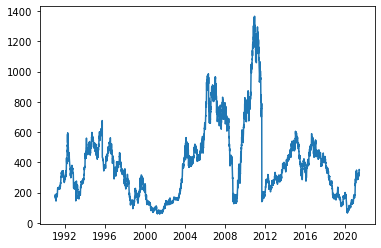

In [12]:
df=df.iloc[::-1]
df['Target']=df['Close Price'].shift(periods=-1)
plt.plot(df.index,df['Target'])

In [13]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-06-07,338.55,351.00,338.55,345.50,346.270172,5575585,77740,1.930659e+09,2202934.0,39.51,12.45,6.95,352.85
2021-06-08,346.75,356.50,337.35,352.85,345.857260,3488224,48363,1.206428e+09,1422250.0,40.77,19.15,6.10,343.25
2021-06-09,356.50,358.80,339.60,343.25,350.737299,4480912,59698,1.571623e+09,1345349.0,30.02,19.20,-13.25,344.60
2021-06-10,345.65,347.85,342.50,344.60,345.174438,1154435,13105,3.984815e+08,202476.0,17.54,5.35,-1.05,350.75
2021-06-11,346.45,352.90,344.75,350.75,349.506362,1605772,21014,5.612275e+08,336860.0,20.98,8.15,4.30,NaN


In [14]:
#data Cleaning
df_m=df
df_m=df_m.dropna()
df_m.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-06-04,325.45,336.90,324.50,334.95,329.707336,1897098,17556,6.254871e+08,552896.0,29.14,12.40,9.50,345.50
2021-06-07,338.55,351.00,338.55,345.50,346.270172,5575585,77740,1.930659e+09,2202934.0,39.51,12.45,6.95,352.85
2021-06-08,346.75,356.50,337.35,352.85,345.857260,3488224,48363,1.206428e+09,1422250.0,40.77,19.15,6.10,343.25
2021-06-09,356.50,358.80,339.60,343.25,350.737299,4480912,59698,1.571623e+09,1345349.0,30.02,19.20,-13.25,344.60
2021-06-10,345.65,347.85,342.50,344.60,345.174438,1154435,13105,3.984815e+08,202476.0,17.54,5.35,-1.05,350.75


In [24]:
# Data Splitting
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.3)

In [25]:
y_test

Date
2010-12-03    1358.50
2021-01-13     245.15
2021-05-04     291.50
2002-10-11     141.35
2005-10-21     517.50
               ...   
2021-03-08     315.20
2008-07-29     416.30
2002-07-12     150.55
2006-02-03     734.60
2010-10-04    1134.35
Name: Target, Length: 1438, dtype: float64

In [26]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [27]:
# Model Initialisation and Fitting
model=SVR(kernel='linear')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [28]:
# Score
model.score(x_test,y_test)

0.9979914224573796

In [29]:
pred_y=model.predict(x_test)
pred_y

array([1318.90017919,  243.98466756,  290.87581052, ...,  155.87065834,
        721.12147605, 1139.22232417])

In [30]:
test_e=mean_squared_error(y_test,pred_y,squared=False)
test_e

12.5570680924221

In [31]:
mean_squared_error(y_test,pred_y)

157.6799590777252

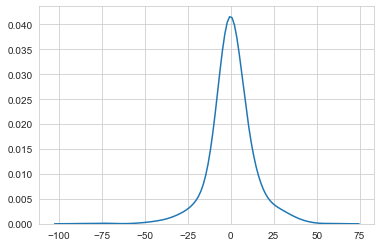

In [38]:
# Difference
delta_y = y_test-pred_y;
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=5)
plt.show()

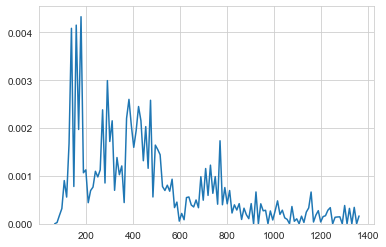

In [39]:
#Plotting
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred_y), bw=0.5)
plt.show()

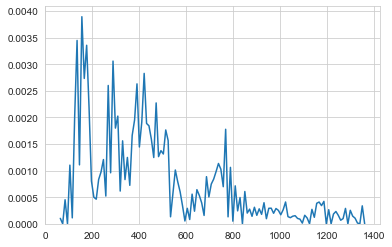

In [40]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test), bw=0.5)
plt.show()

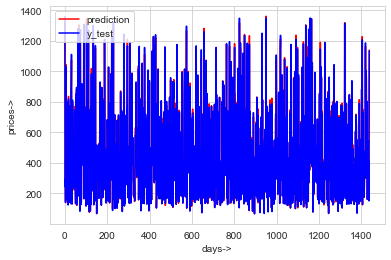

In [41]:
#Predicted vs True Values
# sns.pairplot(df,kind="reg")
plt.plot(pred_y,color='red', label='prediction')
plt.plot(list(y_test),color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# To predict 5-6-21
t=sc.transform([[1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80]])
model.predict(t)